<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Clasificación, Softmax, Iris</center></span>

<center> Clasificación con múltiples categorías</center>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Contenido</span> 

* [Introducción](#Introducción)
* [Importa módulos](#Importa-módulos)
* [Funciones de activación](#Funciones-de-activación)
* [El conjunto de datos Iris](#El-conjunto-de-datos-Iris)
* [Lectura de datos](#Lectura-de-datos)
* [Preprocesamiento](#Preprocesamiento)
* [Crea el modelo usando la API funcional](#Crea-el-modelo-usando-la-API-funcional)
* [Compila](#Compila)
* [Entrena](#Entrena)
* [Evaluación del modelo](#Evaluación-del-modelo)
* [Predicciones](#Predicciones)
* [Matriz de confusión](#Matriz-de-confusión)



## <span style="color:blue">Introducción</span>

Eeta lección está dedicada a un modelo  de clasificación con mútliples categorías, que corresponde a la generalización natural del modelo logístico. 

* Practicaremos la codificación *one-hot* para los datos de salida.
* También usaremos la API funcional de tf.keras, que es una forma de programación maś flexible y poderosa que el modelo Sequential
* Usaremos las funciones *relu* para capas intermedias y entrada y la función de activación *softmax* para la salida, debido a que se tienen varias clases. 

## <span style="color:blue">Importa módulos</span>

Usaremos las bibliotecas
* *seaborn* para gráficas un poco más elegantes
* *sklearn* para utilidades de estandarizacion de datos y matriz de confusión

Puede usar las siguientes instrucciones para isntalr desde la consola.

In [199]:
# !conda install -c anaconda seaborn
# !conda install -c intel scikit-learn

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
#
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
#from sklearn import KFold
print("Versión de Tensorflow:", tf.__version__)

Versión de Tensorflow: 2.4.1


## <span style="color:blue">Funciones de activación</span> 

### Relu

Dada la salida del sumador digamos $y=\mathbf{w}'\mathbf{x} +b$, la función de activación *relu* esta definida por

$$
\text{relu}(y) = \begin{cases} &0, \text{ si } y\le 0,\\
 &y, \text{ en otro caso } \end{cases}
$$



### Softmax


Dados los valores $x_1,\ldots, x_n$ la función *softmax *  es definida por

$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
$$

Es decir, *softmax* transforma los valores en un función de probabilidad.

## <span style="color:blue">El conjunto de datos Iris</span> 


Este conjunto de datos fue introducido por sir [Ronald Fisher]()

## Lectura de datos y primera vista de los datos

Bajamos los datos de Internet usando *tf.keras.utils* y luego los cargamos en dataframes de Python.

In [201]:
# nombres de las columnas de los datos
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
target_dimensions = ['Setosa', 'Versicolor', 'Virginica']

# lee los datos
training_data_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

training = pd.read_csv(training_data_path, names=col_names, header=0)
test = pd.read_csv(test_data_path, names=col_names, header=0)

test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


## <span style="color:blue">Pre-procesamiento</span> 

La variable objetivo (target) tiene tres categorías. Usaremos la codificación one-hot para transformar las codificaciones en vectors binarios.

### Codificación one-hot

In [202]:
y_train= pd.DataFrame(to_categorical(training.Species))
y_train.columns = target_dimensions

y_test = pd.DataFrame(to_categorical(test.Species))
y_test.columns = target_dimensions

In [203]:
y_test

,Setosa,Versicolor,Virginica
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


### Elimina columna Species del dataframe

In [204]:
y_train_species = training.pop('Species')
#test.drop(['Species'], axis=1, inplace=True)
y_test_species = test.pop('Species') # extrae la columna y la coloca en y_test_species
#
#Si necesita subir al dataframe la recodificación use estas líneas
#training = training.join(y_train )
#test = test.join(y_test)

### Normaliza los features

#### StandardScaler

In [205]:
# crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta los parámetros del scaler
scaler.fit(training)
print (scaler.mean_)

# escala training y test
x_train = scaler.transform(training)
x_test = scaler.transform(test)

# labels ( no requieren escalación)


[5.845      3.065      3.73916667 1.19666667]


## <span style="color:blue">Crea el modelo usando la API funcional</span> 

La API funcional de Keras es bastante más flexible y poderosa que el modelo Sequential

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa_entrada (InputLayer)    [(None, 4)]               0         
_________________________________________________________________
activation_16 (Activation)   (None, 4)                 0         
_________________________________________________________________
primera_capa_oculta (Dense)  (None, 8)                 40        
_________________________________________________________________
dropout_20 (Dropout)         (None, 8)                 0         
_________________________________________________________________
segunda_capa_oculta (Dense)  (None, 16)                144       
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
capa_salida (Dense)          (None, 3)                 51 

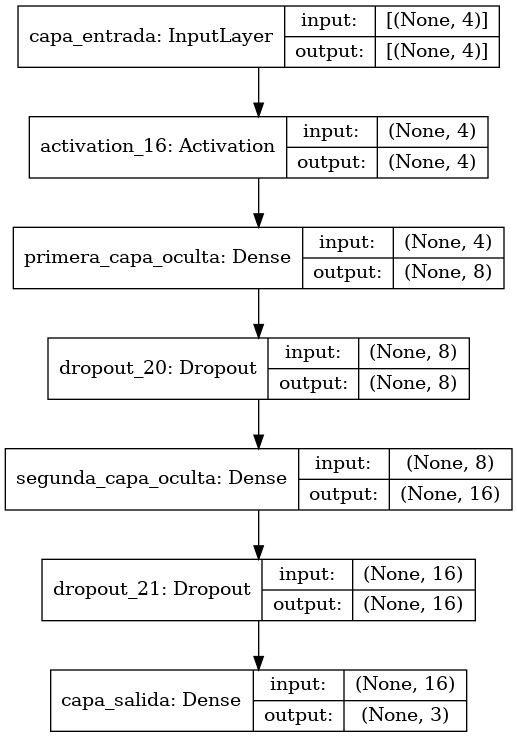

In [266]:
# Con la API funcion se requiere la capa Input que transforma la entrada 
# en un tensor de tensorflow directamente
#
inputs = Input(shape=(4,),name='capa_entrada')
#
# vamos construyendo capa por capa
x = Activation('relu')(inputs)
x = Dense(8, activation='relu',name='primera_capa_oculta')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu', name='segunda_capa_oculta')(x)
x = Dropout(0.2)(x)
outputs = Dense(3, activation='softmax', name='capa_salida')(x)

# Creamos ahora el modelo
model_iris = Model(inputs=inputs, outputs=outputs)

model_iris.summary()
plot_model(model_iris, to_file='../Imagenes/iris_model.png', 
           show_shapes=True)

## <span style="color:blue">Compila</span> 

In [267]:
model_iris.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## <span style="color:blue">Entrena</span> 

In [268]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('.', end='')

epochs = 200


In [269]:
history = model_iris.fit(x_train, y_train,
                    batch_size= 16,
                    epochs= epochs,
                    validation_split=0.1, verbose=0,
                    callbacks=[PrintDot()])     
print('\nHecho')
print('Resultados finales de pérdida y exactitud\n')
# presenta la última parte de la historia
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

........................................................................................................................................................................................................
Hecho
Resultados finales de pérdida y exactitud



,loss,accuracy,val_loss,val_accuracy,epoch
195,0.303951,0.842593,0.360190,0.916667,195
196,0.281763,0.842593,0.361281,0.916667,196
197,0.290119,0.861111,0.361293,0.916667,197
198,0.292439,0.898148,0.360291,0.916667,198
199,0.293885,0.907407,0.360623,0.916667,199


## <span style="color:blue">Evaluación del modelo</span> 

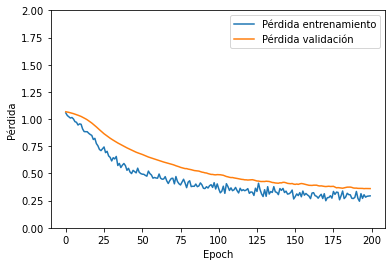

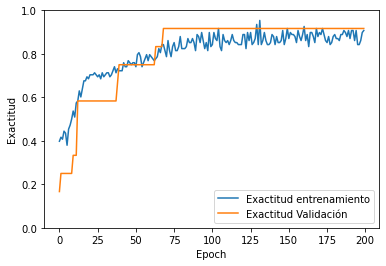

In [270]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Pérdida')
  plt.plot(hist['epoch'], hist['loss'],
           label='Pérdida entrenamiento')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Pérdida validación')
  plt.ylim([0,2])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Exactitud')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Exactitud entrenamiento')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Exactitud Validación')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

## <span style="color:blue">Predicciones</span> 

In [271]:
# Predicting the Test set results
y_pred = model_iris.predict(x_test)
y_pred_c = np.argmax(y_pred, axis=1)

## <span style="color:blue">Matriz de confusión</span> 

In [272]:
cm = confusion_matrix(y_test_species, y_pred_c)

In [273]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1]+ cm[2][2])/y_test_species.shape[0])*100))

Our accuracy is 93.33333333333333%


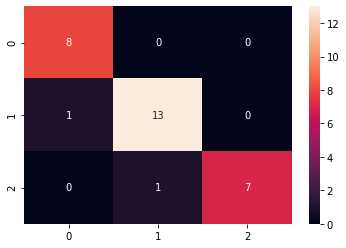

In [274]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

[Regresar al inicio](#Contenido)

## <span style="color:blue">Exploración interna de la red</span> 

### Cálculo de la salida de los datos de entrenamiento

In [275]:
inputs = x_train
outputs = model_iris(inputs)
outputs.numpy().round(2)[:10]

array([[0.  , 0.01, 0.99],
       [0.51, 0.44, 0.05],
       [0.  , 0.38, 0.62],
       [0.8 , 0.18, 0.02],
       [1.  , 0.  , 0.  ],
       [0.98, 0.02, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.02, 0.98],
       [0.02, 0.79, 0.19],
       [1.  , 0.  , 0.  ]], dtype=float32)

### Extrae la segunda capa oculta para estos datos

In [217]:
# modelo Sequential
#layer_2 = tf.keras.models.Model(
#    inputs=model_iris.inputs,
#    outputs=model_iris.get_layer(name='segunda_capa_oculta').output,
#)

In [276]:
# API funcional
# 1. crea un nuevo modelo
# 2. Compila
# 3. Predice

inputs = x_train
model = Model(model_iris.input, model_iris.get_layer(name='segunda_capa_oculta').output)
model.compile()
output = model.predict(inputs)

In [277]:
output.shape

(120, 16)

### Crea tabla de datos para hacer un gráfico tsne

In [278]:
plot_data = np.hstack([output, np.array(y_train_species).reshape(y_train_species.shape[0],1)])
plot_data = pd.DataFrame(plot_data)

In [279]:
plot_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2.467787,0.000000,0.731057,0.000000,0.510913,0.000000,0.000000,0.000000,1.827167,3.498898,2.964854,1.161228,1.649435,2.353893,0.0,0.0,2.0
1,0.000000,0.230899,0.000000,0.215546,0.000000,0.113442,0.213827,0.396466,0.000000,0.100383,0.180319,0.579343,0.000000,0.000000,0.0,0.0,1.0
2,0.981748,0.000000,0.150882,0.000000,0.072097,0.000000,0.000000,0.000000,1.005695,1.802041,1.445802,0.958601,0.674698,1.188161,0.0,0.0,2.0
3,0.000000,0.418447,0.000000,0.336955,0.000000,0.276314,0.321667,0.520616,0.000000,0.000000,0.088640,0.445429,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,2.559006,0.097274,1.694688,0.000000,2.285218,1.820933,1.972289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115792,0.183403,0.435880,0.432974,0.678667,0.000000,0.090053,0.0,0.0,1.0
116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171450,0.110357,0.347058,0.385124,0.669227,0.000000,0.025612,0.0,0.0,1.0
117,0.000000,0.230899,0.000000,0.215546,0.000000,0.113442,0.213827,0.396466,0.000000,0.100383,0.180319,0.579343,0.000000,0.000000,0.0,0.0,0.0
118,0.000000,0.230899,0.000000,0.215546,0.000000,0.113442,0.213827,0.396466,0.000000,0.100383,0.180319,0.579343,0.000000,0.000000,0.0,0.0,0.0


### Crea gráfico tsne

In [280]:
from sklearn.manifold import TSNE

# reduce dimensionalidad con t-sne
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(output)

[t-SNE] Computing 119 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 1.722451
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.608604
[t-SNE] KL divergence after 700 iterations: 0.032179


In [251]:
labels = [target_dimensions[i] for i in y_train_species]
#['Setosa', 'Versicolor', 'Virginica']

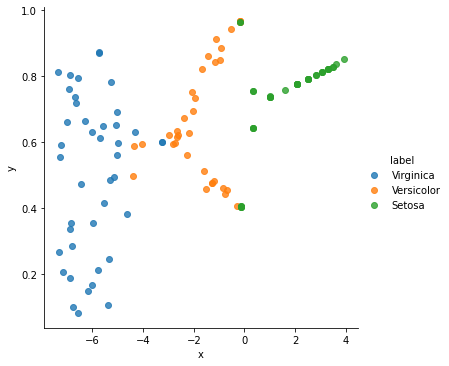

In [281]:
# visualiza con seaborn
df_tsne = pd.DataFrame(tsne_results, columns=['x', 'y'])
df_tsne['label'] = labels
sns.lmplot(x='x', y='y', data=df_tsne, hue='label', fit_reg=False)

### Ejercicio

1. Reescriba y reentren la red en Pytorch.
1. Investigue como extraer la capa oculta en Pytorch
1. Haga un gráfico TSNE para los datos originales
1. Haga un reducción ACP y haga el correspondiente gráfico

¿Cuáles son sus conclusiones?